## Importing libraires

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from prophet.plot import plot_plotly, plot_components_plotly

## Load Dataset


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MY DOCUMENTS/Docs/Notes/Time Series Analysis Projects/archive/BTC/BTC-Daily.csv')

In [ ]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [ ]:
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03
mean,1.531613e+09,11693.189332,12038.562912,11296.539461,11709.326213,1.330041e+07,6.099369e+07
std,6.613247e+07,16272.554746,16739.237000,15718.297511,16282.908704,4.715366e+07,1.072838e+08
min,1.417133e+09,162.000000,212.840000,152.400000,162.000000,0.000000e+00,0.000000e+00
25%,1.474373e+09,654.680000,664.460000,640.050000,654.370000,5.357883e+03,9.516170e+03
50%,1.531613e+09,6408.950000,6540.000000,6312.000000,6407.770000,1.503310e+04,2.288982e+07
75%,1.588853e+09,10708.620000,10956.240000,10303.755000,10726.425000,3.435336e+06,8.018383e+07
max,1.646093e+09,67547.490000,69000.000000,66250.000000,67559.000000,7.723295e+08,1.446125e+09


Here we can that the volumne of some of the rows are zero

In [ ]:
df['Volume BTC'] = df['Volume BTC'].replace(0.00, method='ffill')  # Forward-fill
df['Volume USD'] = df['Volume USD'].replace(0.00, method='ffill')  # Forward-fill

In [ ]:
df.dtypes

unix            int64
date           object
symbol         object
open          float64
high          float64
low           float64
close         float64
Volume BTC    float64
Volume USD    float64
dtype: object

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.dtypes

unix                   int64
date          datetime64[ns]
symbol                object
open                 float64
high                 float64
low                  float64
close                float64
Volume BTC           float64
Volume USD           float64
dtype: object

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


In [ ]:
df = df.sort_index()

In [ ]:
df.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2014-11-28,1417132800,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15
2014-11-29,1417219200,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19
2014-11-30,1417305600,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33
2014-12-01,1417392000,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56
2014-12-02,1417478400,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53


In [ ]:
df.shape

(2651, 8)

In [ ]:
# Calculate the volume-weighted price
df['VWAP'] = (df['close'] * df['Volume USD'] + df['open'] * df['Volume USD'] + df['low'] * df['Volume USD']) / (3 * df['Volume USD'])

df

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,VWAP
date,,,,,,,,,
2014-11-28,1417132800,BTC/USD,363.59,381.34,360.57,376.28,3.220878e+06,8.617150e+03,366.813333
2014-11-29,1417219200,BTC/USD,376.42,386.60,372.25,376.72,2.746157e+06,7.245190e+03,375.130000
2014-11-30,1417305600,BTC/USD,376.57,381.99,373.32,373.34,1.145567e+06,3.046330e+03,374.410000
2014-12-01,1417392000,BTC/USD,376.40,382.31,373.03,378.39,2.520662e+06,6.660560e+03,375.940000
2014-12-02,1417478400,BTC/USD,378.39,382.86,375.23,379.25,2.593576e+06,6.832530e+03,377.623333
...,...,...,...,...,...,...,...,...,...
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2.202852e+03,8.642149e+07,38540.060000
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,9.127241e+02,3.573010e+07,38996.433333
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1.701817e+03,6.418008e+07,37958.360000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2651 entries, 2014-11-28 to 2022-03-01
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        2651 non-null   int64  
 1   symbol      2651 non-null   object 
 2   open        2651 non-null   float64
 3   high        2651 non-null   float64
 4   low         2651 non-null   float64
 5   close       2651 non-null   float64
 6   Volume BTC  2651 non-null   float64
 7   Volume USD  2651 non-null   float64
 8   VWAP        2651 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 207.1+ KB


## EDA

The opening is the time at 9:00 am and close is time at 3:00 pm for a particu;ar day

In [ ]:
data = df.copy()

Text(0, 0.5, 'Daily Opening price')

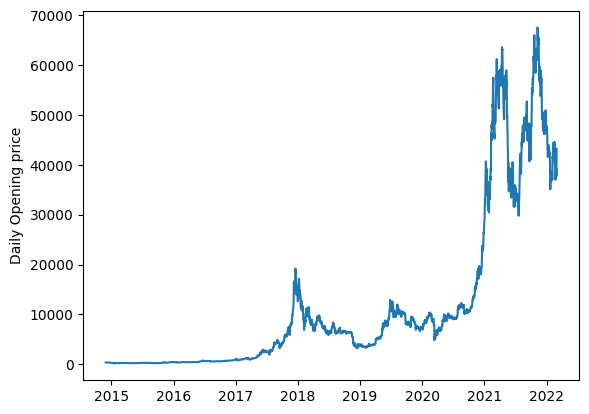

In [ ]:
plt.plot(data['open'])
plt.ylabel('Daily Opening price')

Text(0, 0.5, 'Daily Closing price')

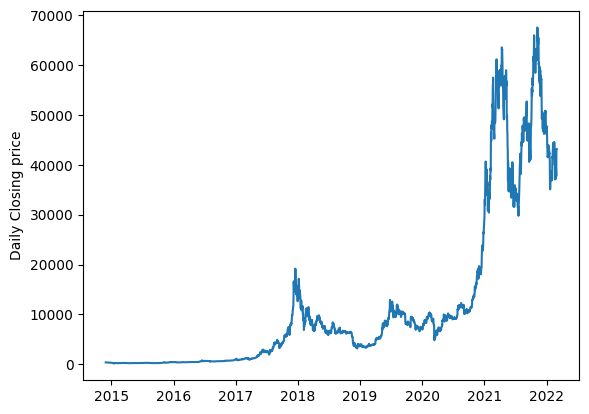

In [ ]:
plt.plot(data['close'])
plt.ylabel('Daily Closing price')

In [ ]:
VWAP = data['VWAP']

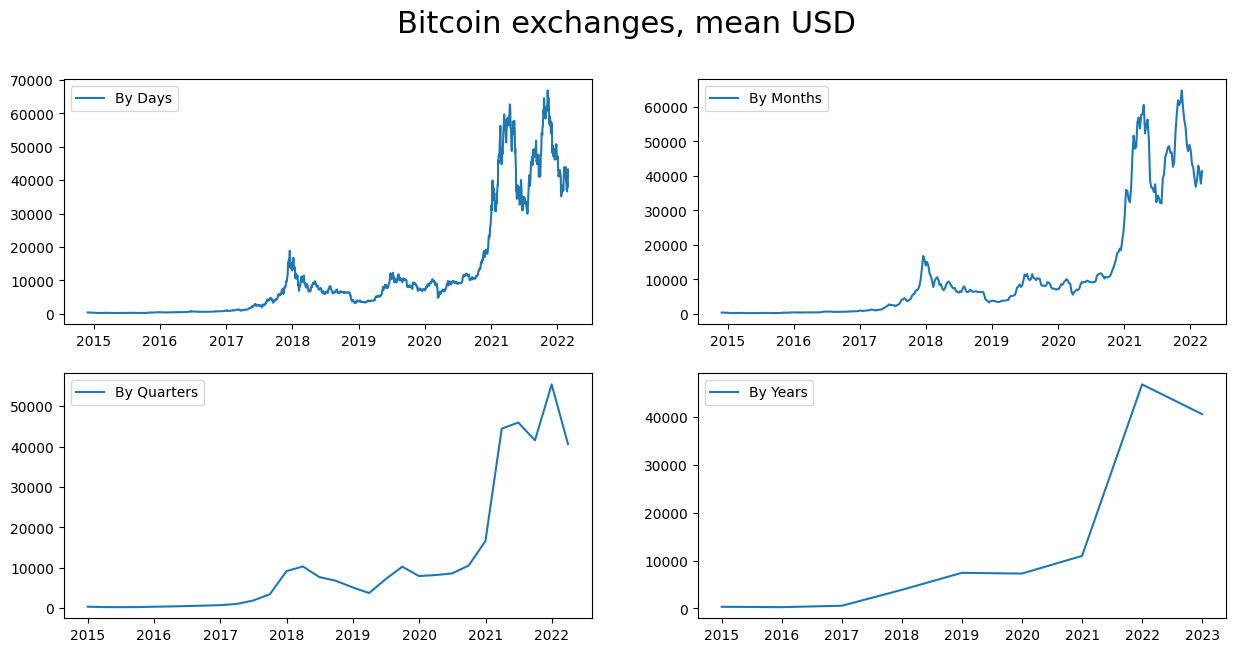

In [ ]:
# PLOTS
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(VWAP, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(VWAP.resample('w').mean(), '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(VWAP.resample('Q-DEC').mean(), '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(VWAP.resample('y').mean(), '-', label='By Years')
plt.legend()

plt.show()

In [ ]:
VWAP.index.strftime("%m").unique()

Index(['11', '12', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10'], dtype='object', name='date')

In [ ]:
VWAP.index.dayofyear

Int64Index([332, 333, 334, 335, 336, 337, 338, 339, 340, 341,
            ...
             51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
           dtype='int64', name='date', length=2651)

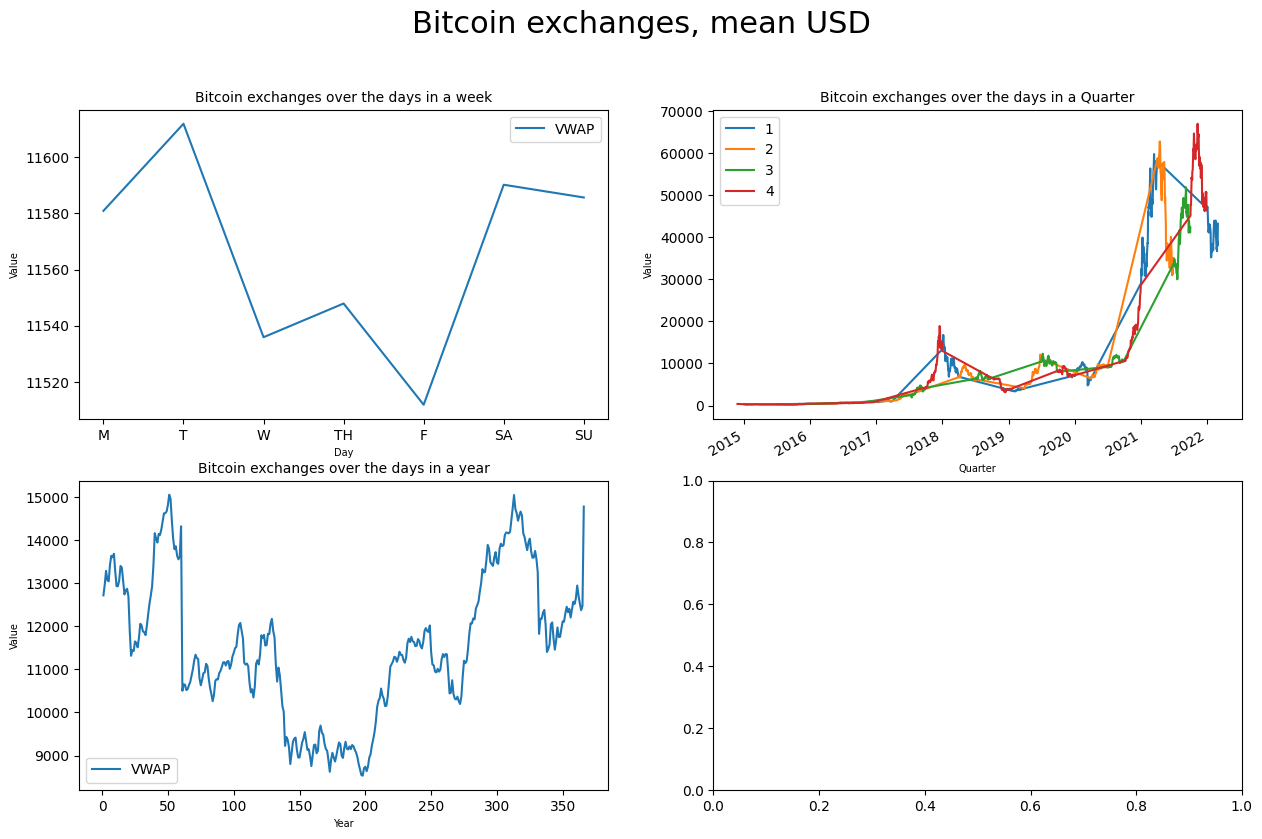

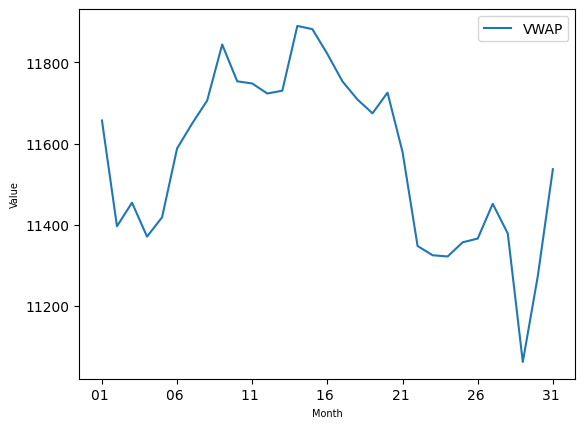

In [ ]:
# PLOTS
fig = plt.figure(figsize=[15, 10])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
weekday = VWAP.groupby(VWAP.index.dayofweek).mean()
weekday.index = ['M', 'T', 'W', 'TH', 'F', 'SA', 'SU']
weekday.plot()
plt.title('Bitcoin exchanges over the days in a week',fontsize=10)
plt.ylabel('Value',fontsize=7)
plt.xlabel('Day',fontsize=7)
plt.legend()

plt.subplot(222)
quart = VWAP.groupby(VWAP.index.quarter)
quart.plot()
plt.title('Bitcoin exchanges over the days in a Quarter',fontsize=10)
plt.ylabel('Value',fontsize=7)
plt.xlabel('Quarter',fontsize=7)
plt.legend()

plt.subplot(223)
yearday = VWAP.groupby(VWAP.index.dayofyear).mean()
yearday.plot()
plt.title('Bitcoin exchanges over the days in a year',fontsize=10)
plt.ylabel('Value',fontsize=7)
plt.xlabel('Year',fontsize=7)
plt.legend()

plt.subplot(224)
month_close = data['VWAP']
month_close = month_close.reset_index()
month_close['date'] = month_close['date'].apply(lambda x : (str(x).split("-")[-1][:3]))
month_close = month_close.groupby('date').mean()
month_close.plot()
plt.ylabel('Value',fontsize=7)
plt.xlabel('Month',fontsize=7)

plt.show()

In [ ]:
data['dayofweek'] = data.index.dayofweek

In [ ]:
data.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,VWAP,dayofweek
date,,,,,,,,,,
2014-11-28,1417132800,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15,366.813333,4
2014-11-29,1417219200,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19,375.130000,5
2014-11-30,1417305600,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33,374.410000,6
2014-12-01,1417392000,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56,375.940000,0
2014-12-02,1417478400,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53,377.623333,1


In [ ]:
def func(val):
  if val<5:
    return 'Weekdays'
  else:
    return 'Weekends'

In [ ]:
data['dayofweek'] = data['dayofweek'].apply(func)

In [ ]:
data.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,VWAP,dayofweek
date,,,,,,,,,,
2014-11-28,1417132800,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15,366.813333,Weekdays
2014-11-29,1417219200,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19,375.130000,Weekends
2014-11-30,1417305600,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33,374.410000,Weekends
2014-12-01,1417392000,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56,375.940000,Weekdays
2014-12-02,1417478400,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53,377.623333,Weekdays


<Axes: title={'center': 'Weekends'}, xlabel='date'>

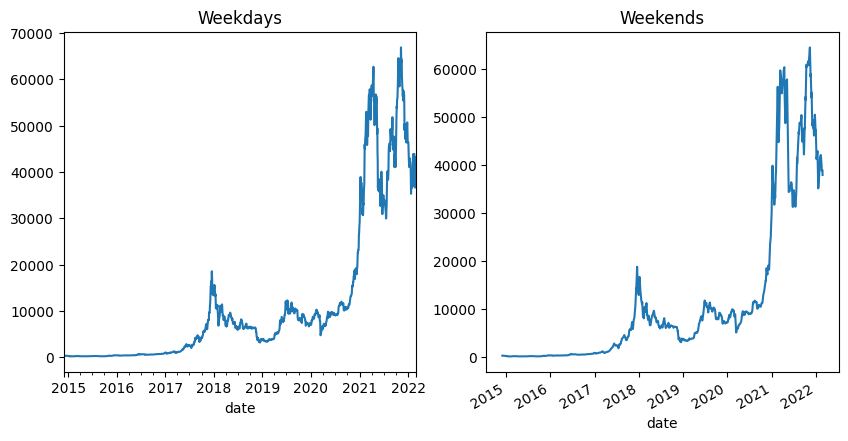

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

data[data['dayofweek']=='Weekdays']['VWAP'].plot(ax=ax[0], title='Weekdays')
data[data['dayofweek']=='Weekends']['VWAP'].plot(ax=ax[1], title='Weekends')

## EDA 2

In [ ]:
data.tail()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,VWAP,dayofweek
date,,,,,,,,,,
2022-02-25,1645747200,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07,38540.060000,Weekdays
2022-02-26,1645833600,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07,38996.433333,Weekends
2022-02-27,1645920000,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07,37958.360000,Weekends
2022-02-28,1646006400,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08,39455.023333,Weekdays
2022-03-01,1646092800,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06,43197.556667,Weekdays


Dickey–Fuller test: p=0.799652


<Figure size 1500x700 with 0 Axes>

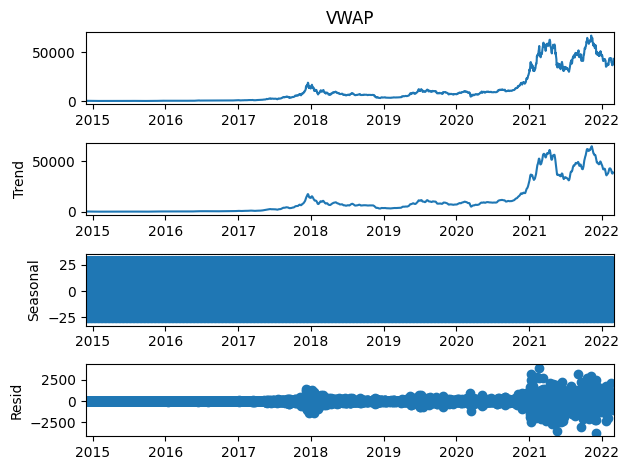

In [ ]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(data.VWAP).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(data.VWAP)[1])
plt.show()

In [ ]:
mean = data['VWAP'].rolling(window=7).mean()
std =  data['VWAP'].rolling(window=7).std()

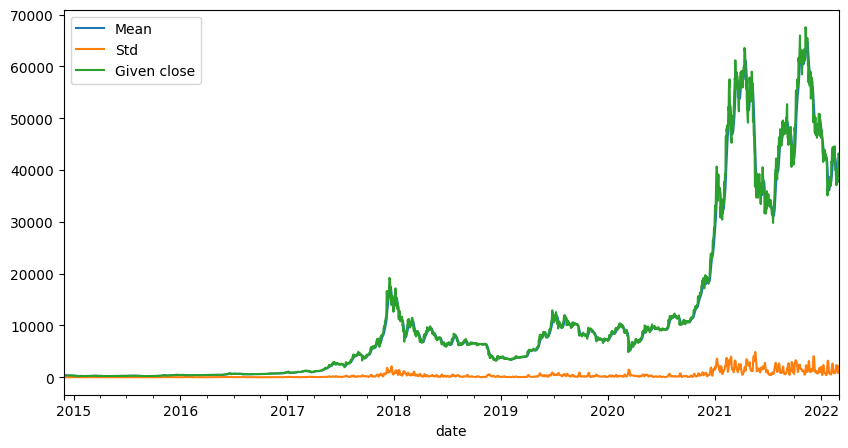

In [ ]:
plt.figure(figsize=(10,5))
mean.plot(label='Mean')
std.plot(label='Std')
data['close'].plot(label='Given close')
plt.legend()

Here we can ccnclude that the data (i.e close) is not stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def stationary_test(feat):
  mean = data[feat].rolling(window=7).mean()
  std =  data[feat].rolling(window=7).std()
  plt.figure(figsize=(10,5))
  mean.plot(label='Mean')
  std.plot(label='Std')
  data[feat].plot(label='Given {}'.format(feat))
  plt.legend()

  res = adfuller(data[feat].dropna())
  labels = ['The test statistic.', 'pvalue', 'usedlag', 'nobs']
  for i,j in zip(res, labels):
    print(j, "-", i)
  if res[1]<0.05:
    print('We have strong evidence against H0, and thus we will reject it. The data is Stationary !!')
  else:
    print('We do not have strong evidence against H0, and thus we wont reject it. The data is not Stationary !!')

The test statistic. - -0.8638244387593051
pvalue - 0.7996520658433541
usedlag - 27
nobs - 2623
We do not have strong evidence against H0, and thus we wont reject it. The data is not Stationary !!


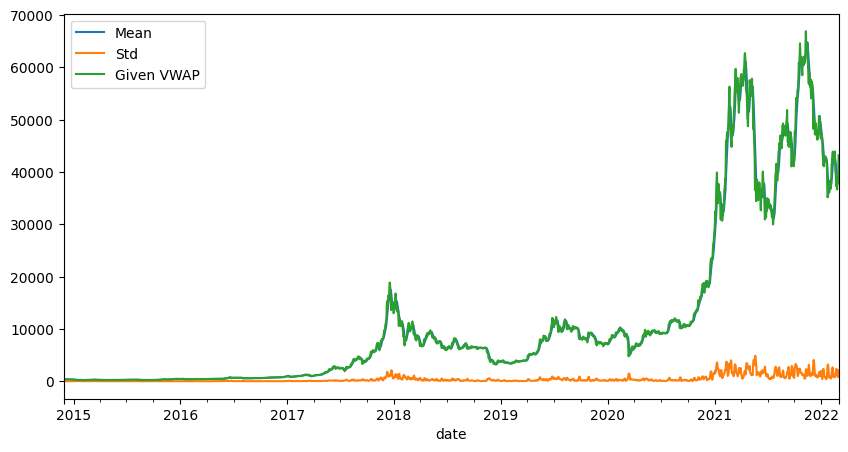

In [ ]:
stationary_test('VWAP')

Removing trend from the data

In [ ]:
np.log(2.7)

0.9932517730102834

<Axes: xlabel='date'>

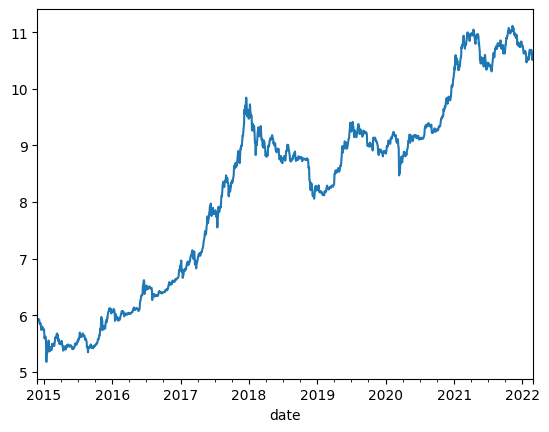

In [ ]:
log_data = np.log(data['VWAP'])
log_data.plot()

In [ ]:
Rolling_avg = log_data.rolling(window=14).mean()

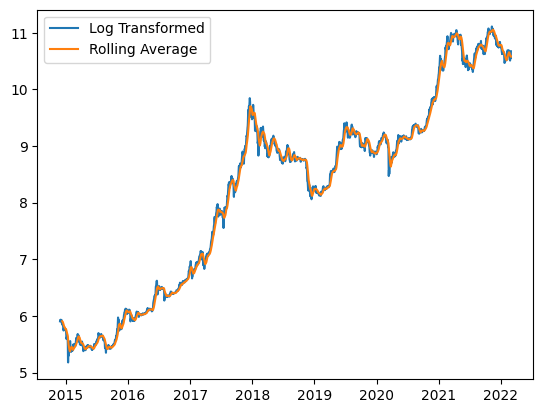

In [ ]:
plt.plot(log_data, label='Log Transformed')
plt.plot(Rolling_avg, label='Rolling Average')
plt.legend()

In [ ]:
lr_diff = log_data - Rolling_avg

In [ ]:
data['lr_diff'] = lr_diff

The test statistic. - -9.616254473244577
pvalue - 1.7571801136492812e-16
usedlag - 12
nobs - 2625
We have strong evidence against H0, and thus we will reject it. The data is Stationary !!


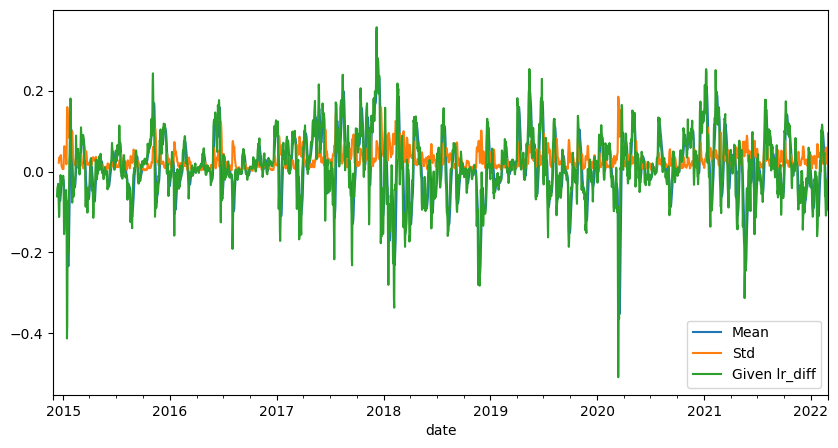

In [ ]:
stationary_test('lr_diff')

In [ ]:
rolling_avg = log_data - log_data.shift(13)
data['log_ts'] = rolling_avg

The test statistic. - -5.93413814703346
pvalue - 2.3425982306745352e-07
usedlag - 28
nobs - 2608
We have strong evidence against H0, and thus we will reject it. The data is Stationary !!


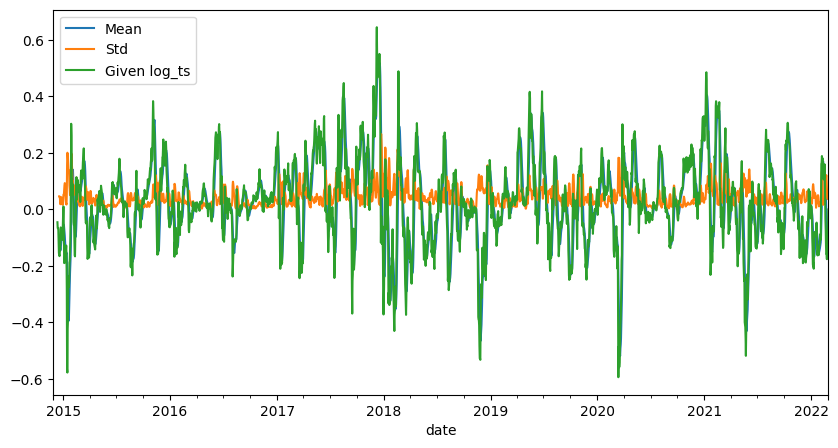

In [ ]:
stationary_test('log_ts')

In [ ]:
data.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,VWAP,dayofweek,lr_diff,log_ts
date,,,,,,,,,,,,
2014-11-28,1417132800,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15,366.813333,Weekdays,NaN,NaN
2014-11-29,1417219200,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19,375.130000,Weekends,NaN,NaN
2014-11-30,1417305600,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33,374.410000,Weekends,NaN,NaN
2014-12-01,1417392000,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56,375.940000,Weekdays,NaN,NaN
2014-12-02,1417478400,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53,377.623333,Weekdays,NaN,NaN


## Fbprophet Model

In [ ]:
data.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,VWAP,dayofweek,lr_diff,log_ts
date,,,,,,,,,,,,
2014-11-28,1417132800,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15,366.813333,Weekdays,NaN,NaN
2014-11-29,1417219200,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19,375.130000,Weekends,NaN,NaN
2014-11-30,1417305600,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33,374.410000,Weekends,NaN,NaN
2014-12-01,1417392000,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56,375.940000,Weekdays,NaN,NaN
2014-12-02,1417478400,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53,377.623333,Weekdays,NaN,NaN


In [ ]:
# !pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
df = data['log_ts']
df = df.reset_index()
df.columns = ['ds', 'y']

In [ ]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

In [ ]:
model = Prophet()
m = model.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98woznh9/8qlct032.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98woznh9/05r8mx7j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14439', 'data', 'file=/tmp/tmp98woznh9/8qlct032.json', 'init=/tmp/tmp98woznh9/05r8mx7j.json', 'output', 'file=/tmp/tmp98woznh9/prophet_modelyjs01ult/prophet_model-20230716134452.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:44:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:44:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365, freq="D")

In [ ]:
future

,ds
0,2014-11-28
1,2014-11-29
2,2014-11-30
3,2014-12-01
4,2014-12-02
...,...
2646,2022-02-25
2647,2022-02-26
2648,2022-02-27
2649,2022-02-28


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2646,2022-02-25,0.248299,0.077394,0.429027
2647,2022-02-26,0.240704,0.068691,0.414821
2648,2022-02-27,0.231572,0.059605,0.392017
2649,2022-02-28,0.221091,0.042787,0.403233
2650,2022-03-01,0.209828,0.040560,0.369074


In [ ]:
# forecast['yhat'] = np.exp(forecast['yhat'])

In [ ]:
# model.plot(forecast)

In [ ]:
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

## Evaluate Your Model

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[-365:]['yhat']

In [ ]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

Root Mean Squared Error between actual and  predicted values:  0.21129400269250392
Mean Value of Test Dataset: -0.008903235034260482


In [ ]:
'RMSE of lr_diff',0.0011745652954120468/0.05991101257491004 * 100

('RMSE of lr_diff', 1.9605165142943013)

In [ ]:
'RMSE of log_ts', 0.0034748470078172803/0.12250312088229993 * 100

('RMSE of log_ts', 2.836537536995394)

In [ ]:
'RMSE of close', 16698.373971352954/47526.85454794521 * 100

('RMSE of close', 35.13460785524444)

## Prediction for next 2 years

In [ ]:
df = data['lr_diff']
df = df.reset_index()
df.columns = ['ds', 'y']

In [ ]:
model = Prophet()
m = model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98woznh9/pbfidef4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp98woznh9/tfn7dawn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67800', 'data', 'file=/tmp/tmp98woznh9/pbfidef4.json', 'init=/tmp/tmp98woznh9/tfn7dawn.json', 'output', 'file=/tmp/tmp98woznh9/prophet_modelm3e3zmns/prophet_model-20230716134405.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:44:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:44:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365*2, freq="D")

In [ ]:
future

,ds
0,2014-11-28
1,2014-11-29
2,2014-11-30
3,2014-12-01
4,2014-12-02
...,...
3376,2024-02-25
3377,2024-02-26
3378,2024-02-27
3379,2024-02-28


In [ ]:
forecast = m.predict(future)

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3376,2024-02-25,0.002055,-0.098064,0.091352
3377,2024-02-26,-0.003048,-0.101300,0.096440
3378,2024-02-27,-0.007005,-0.117131,0.090852
3379,2024-02-28,-0.014468,-0.114446,0.089164
3380,2024-02-29,-0.021418,-0.116691,0.069126


In [ ]:
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
from prophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(m, horizon='365 days', period='180 days', initial='1095 days')

INFO:prophet:Making 7 forecasts with cutoffs between 2018-03-17 00:00:00 and 2021-03-01 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpsu3o7fs1/1p6tps0g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsu3o7fs1/pqpiygom.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89478', 'data', 'file=/tmp/tmpsu3o7fs1/1p6tps0g.json', 'init=/tmp/tmpsu3o7fs1/pqpiygom.json', 'output', 'file=/tmp/tmpsu3o7fs1/prophet_model4s43ev3o/prophet_model-20230715162557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:25:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:25:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsu3o7fs1/a2eqokvn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpsu3o7fs1/z0wrj12c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2018-03-18,-0.035765,-0.124892,0.053729,-0.146665,2018-03-17
1,2018-03-19,-0.035071,-0.126453,0.055199,-0.059979,2018-03-17
2,2018-03-20,-0.034097,-0.126678,0.052157,-0.007712,2018-03-17
3,2018-03-21,-0.036916,-0.129672,0.047759,0.029431,2018-03-17
4,2018-03-22,-0.035536,-0.123038,0.055956,0.017952,2018-03-17
...,...,...,...,...,...,...
2550,2022-02-25,0.102833,0.008383,0.203418,-0.037270,2021-03-01
2551,2022-02-26,0.100358,0.011041,0.202675,-0.019987,2021-03-01
2552,2022-02-27,0.092548,-0.006017,0.179147,-0.039631,2021-03-01
2553,2022-02-28,0.085679,-0.005970,0.185021,0.003616,2021-03-01


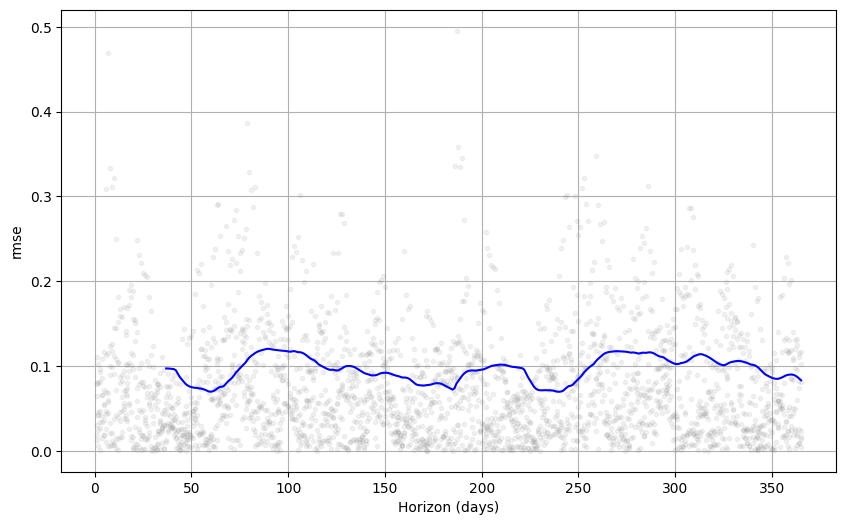

In [ ]:
from prophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='rmse')

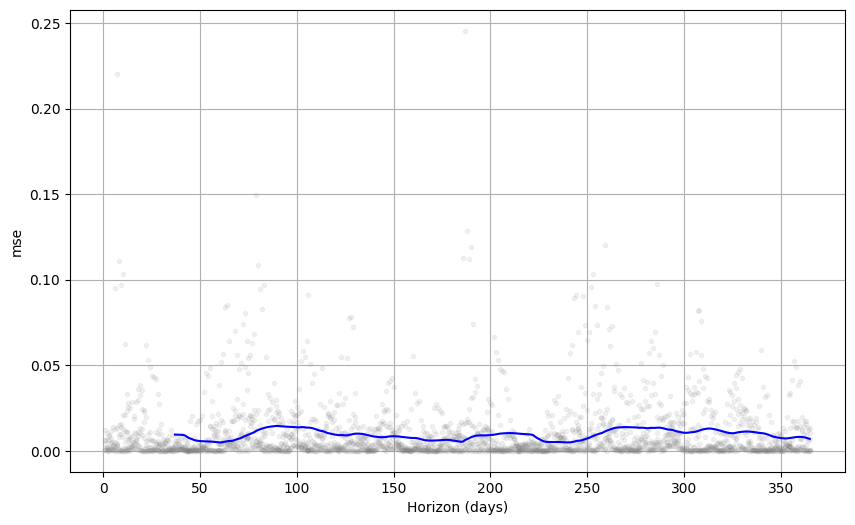

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mse')

## ARIMA model

In [ ]:
data[:15]

,unix,symbol,open,high,low,close,Volume BTC,Volume USD,VWAP,dayofweek,lr_diff,log_ts
date,,,,,,,,,,,,
2014-11-28,1417132800,BTC/USD,363.59,381.34,360.57,376.28,3220878.18,8617.15,366.813333,Weekdays,NaN,NaN
2014-11-29,1417219200,BTC/USD,376.42,386.60,372.25,376.72,2746157.05,7245.19,375.130000,Weekends,NaN,NaN
2014-11-30,1417305600,BTC/USD,376.57,381.99,373.32,373.34,1145566.61,3046.33,374.410000,Weekends,NaN,NaN
2014-12-01,1417392000,BTC/USD,376.40,382.31,373.03,378.39,2520662.37,6660.56,375.940000,Weekdays,NaN,NaN
2014-12-02,1417478400,BTC/USD,378.39,382.86,375.23,379.25,2593576.46,6832.53,377.623333,Weekdays,NaN,NaN
2014-12-03,1417564800,BTC/USD,379.25,383.00,374.23,376.67,2998357.92,7908.29,376.716667,Weekdays,NaN,NaN
2014-12-04,1417651200,BTC/USD,376.67,378.99,360.01,365.20,3297896.46,8865.09,367.293333,Weekdays,NaN,NaN
2014-12-05,1417737600,BTC/USD,365.20,377.89,363.99,374.95,3331762.49,8951.16,368.046667,Weekdays,NaN,NaN
2014-12-06,1417824000,BTC/USD,374.95,376.99,371.31,375.07,861748.71,2300.21,373.776667,Weekends,NaN,NaN


Dickey–Fuller test: p=0.000000


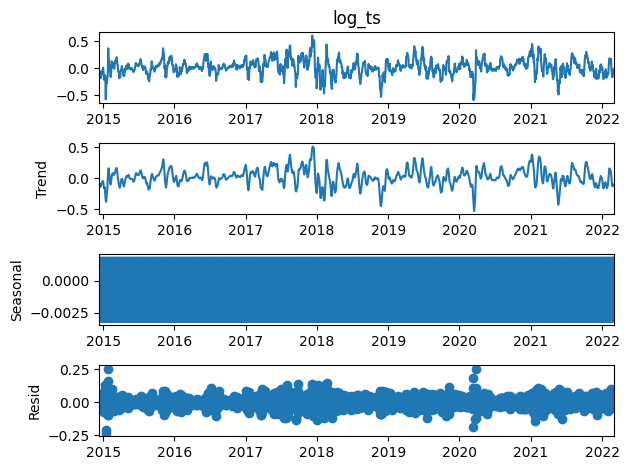

In [ ]:
# STL-decomposition
sm.tsa.seasonal_decompose(data.log_ts[13:]).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(data.log_ts[13:])[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



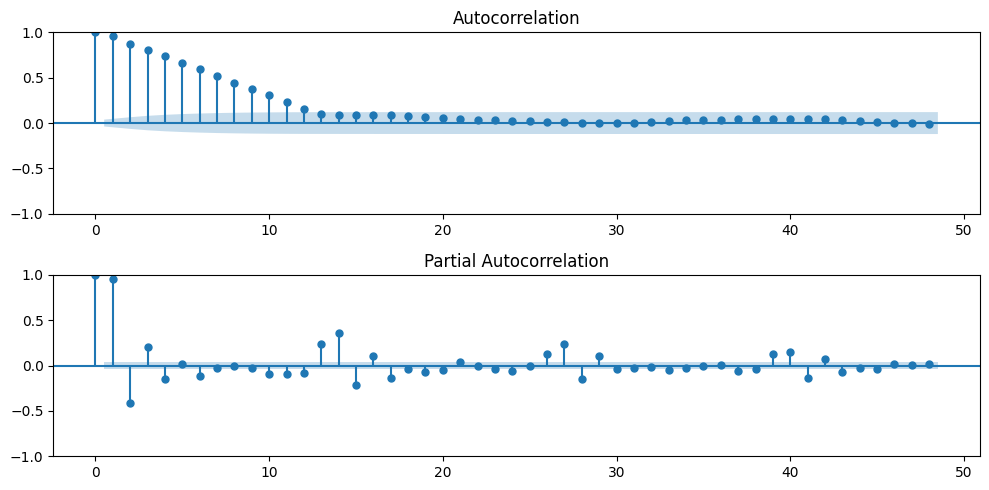

In [ ]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(10,5))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data.log_ts[13:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data.log_ts[13:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
data['log_ts2'] = data['log_ts'] - data['log_ts'].shift(1)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



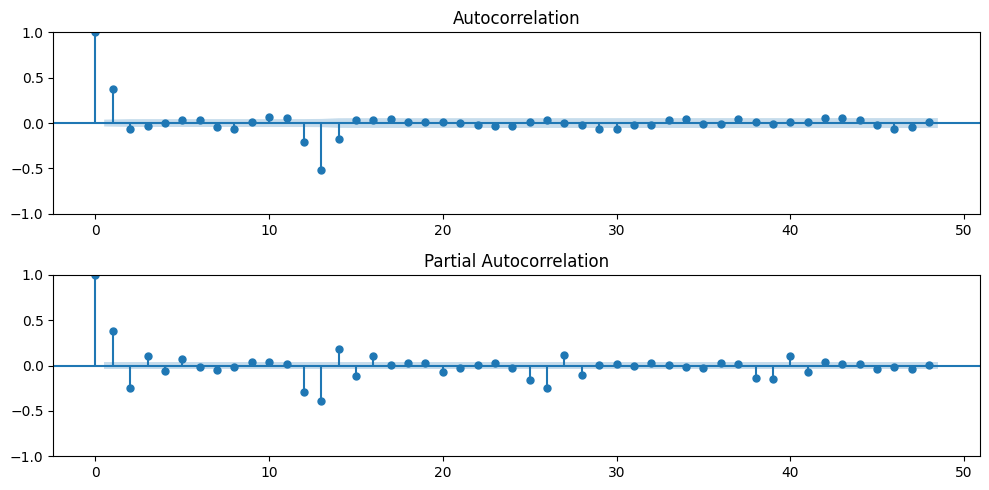

In [ ]:
# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(10,5))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data.log_ts2[14:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data.log_ts2[14:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
from itertools import product

In [ ]:
# Initial approximation of parameters
ps = range(0, 3)
qs = range(0, 3)
D=1
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list), parameters_list

(9, [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)])

In [ ]:
data2 = data.VWAP
data2.head()

date
2014-11-28    366.813333
2014-11-29    375.130000
2014-11-30    374.410000
2014-12-01    375.940000
2014-12-02    377.623333
Name: VWAP, dtype: float64

In [ ]:
# Model Selection
import warnings
from statsmodels.tsa.arima.model import ARIMA

results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    try:
        model = ARIMA(data2, order=(param[0], 1, param[1])).fit()
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [ ]:
results

[[(0, 0), 41503.22119397871],
 [(0, 1), 41068.50666014125],
 [(0, 2), 41068.893382302165],
 [(1, 0), 41176.12771399363],
 [(1, 1), 41069.200104982534],
 [(1, 2), 41070.1753480378],
 [(2, 0), 41088.40084509473],
 [(2, 1), 41066.01863848435],
 [(2, 2), 41049.89736148043]]

In [ ]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

  parameters           aic
8     (2, 2)  41049.897361
7     (2, 1)  41066.018638
1     (0, 1)  41068.506660
2     (0, 2)  41068.893382
4     (1, 1)  41069.200105
                               SARIMAX Results                                
Dep. Variable:                   VWAP   No. Observations:                 2651
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -20519.949
Date:                Sun, 16 Jul 2023   AIC                          41049.897
Time:                        13:59:41   BIC                          41079.309
Sample:                    11-28-2014   HQIC                         41060.544
                         - 03-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6521      0.049    -13.235     

In [ ]:
from datetime import datetime

# Prediction
df_month2 = data[['VWAP']]
# date_list = [datetime(2022, 3, 30), datetime(2022, 4, 30), datetime(2022, 5, 30), datetime(2022, 6, 30),
#              datetime(2022, 7, 30), datetime(2022, 8, 30), datetime(2022, 9, 30), datetime(2022, 10, 30),
#              datetime(2022, 11, 30), datetime(2022, 12, 30), datetime(2023, 1, 30), datetime(2023, 1, 28)]

# future = pd.DataFrame(index=date_list, columns = data.columns)
# df_month2 = pd.concat([df_month2, future])
df_month2 = df_month2[['VWAP']]
df_month2

,VWAP
date,
2014-11-28,366.813333
2014-11-29,375.130000
2014-11-30,374.410000
2014-12-01,375.940000
2014-12-02,377.623333
...,...
2022-02-25,38540.060000
2022-02-26,38996.433333
2022-02-27,37958.360000


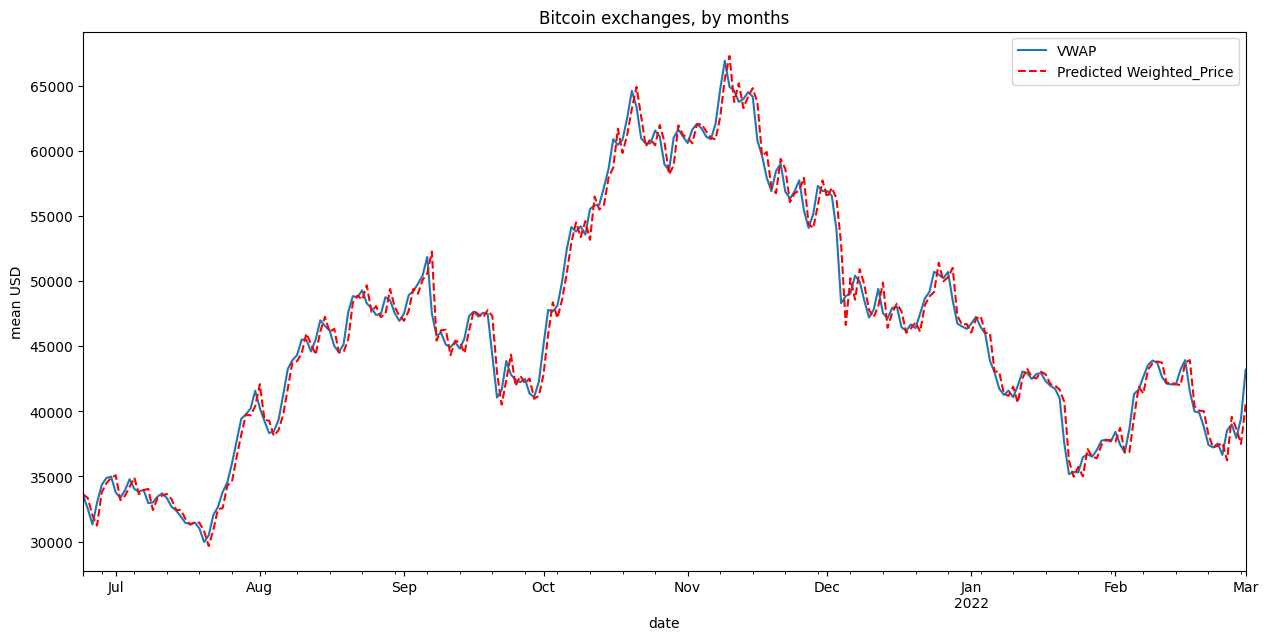

In [ ]:
df_month2['forecast'] = best_model.predict(start=0, end=365*8)
plt.figure(figsize=(15,7))
df_month2.VWAP[2400:].plot()
df_month2.forecast[2400:].plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

## SARIMAX

In [ ]:
train = data2[:2200]
test = data2[2200:]

In [ ]:
# !pip install pmdarima

In [ ]:
import pmdarima as pm
from pmdarima import auto_arima

In [ ]:
model = auto_arima(data2, start_p=0, start_q=0,
                          max_p=2, max_q=2,m=13,start_P=0,start_Q=0,
                          max_P = 2, max_Q = 2,
                          seasonal=True,
                          d=1,D=1,trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[13]             : AIC=43150.011, Time=0.56 sec
 ARIMA(1,1,0)(1,1,0)[13]             : AIC=41984.048, Time=15.98 sec
 ARIMA(0,1,1)(0,1,1)[13]             : AIC=inf, Time=20.35 sec
 ARIMA(1,1,0)(0,1,0)[13]             : AIC=42796.281, Time=1.01 sec
 ARIMA(1,1,0)(2,1,0)[13]             : AIC=41777.084, Time=32.48 sec
 ARIMA(1,1,0)(2,1,1)[13]             : AIC=inf, Time=38.36 sec
 ARIMA(1,1,0)(1,1,1)[13]             : AIC=inf, Time=12.32 sec
 ARIMA(0,1,0)(2,1,0)[13]             : AIC=42059.430, Time=4.52 sec
 ARIMA(2,1,0)(2,1,0)[13]             : AIC=41685.163, Time=20.41 sec
 ARIMA(2,1,0)(1,1,0)[13]             : AIC=41884.700, Time=10.39 sec
 ARIMA(2,1,0)(2,1,1)[13]             : AIC=inf, Time=38.86 sec
 ARIMA(2,1,0)(1,1,1)[13]             : AIC=inf, Time=17.39 sec
 ARIMA(2,1,1)(2,1,0)[13]             : AIC=41648.885, Time=27.08 sec
 ARIMA(2,1,1)(1,1,0)[13]             : AIC=41853.776, Time=10.47 sec
 ARIMA(2,1,1)(2,1,1)[13]

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
final_model = SARIMAX(train,order=(2,1,2),seasonal_order=(2,1,0,13))
result = final_model.fit()
print(result.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                VWAP   No. Observations:                 2200
Model:             SARIMAX(2, 1, 2)x(2, 1, [], 13)   Log Likelihood              -14909.496
Date:                             Sun, 16 Jul 2023   AIC                          29832.993
Time:                                     14:41:56   BIC                          29872.822
Sample:                                 11-28-2014   HQIC                         29847.551
                                      - 12-05-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9991      0.020     50.808      0.000       0.961       1.038
ar.L2         -0.0259      

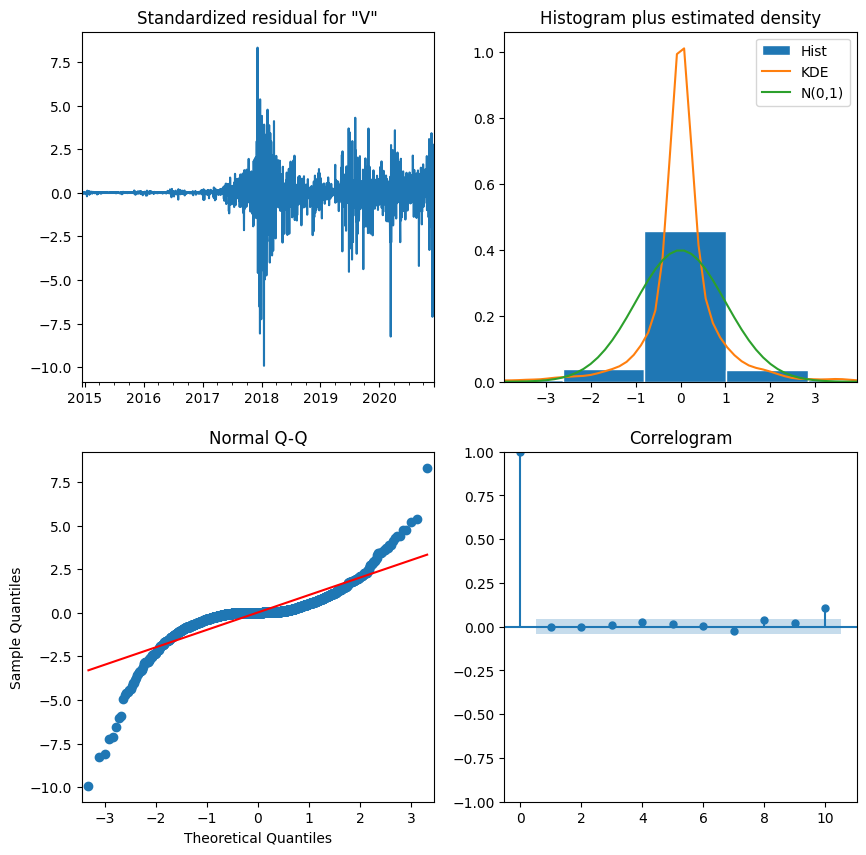

In [ ]:
res = result.plot_diagnostics(figsize=(10, 10))

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Production')]

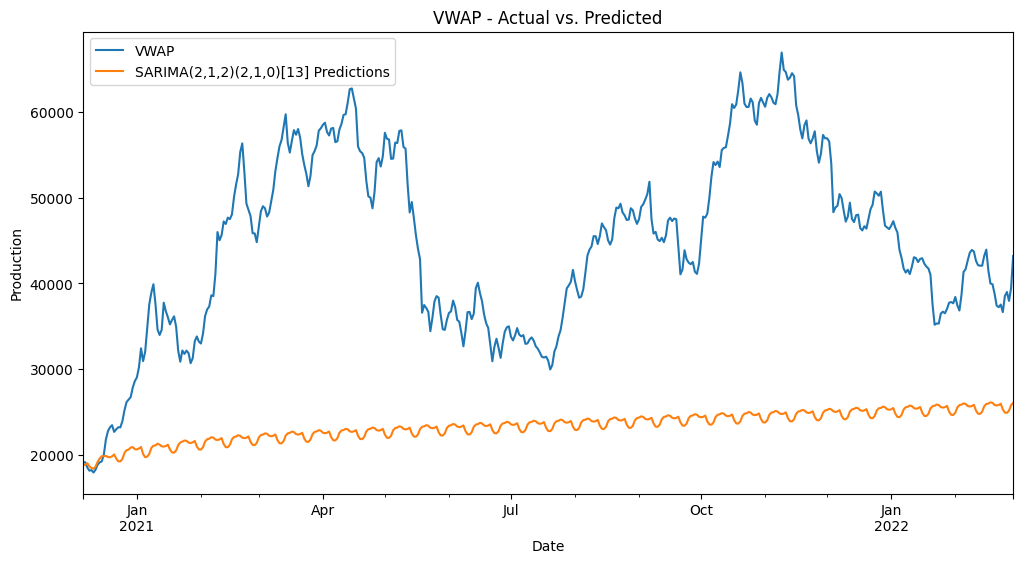

In [ ]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = result.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(2,1,2)(2,1,0)[13] Predictions')
# Plot predictions against known values
title = 'VWAP - Actual vs. Predicted'
ylabel='Production'
xlabel='Date'

ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [ ]:
predictions

2020-12-06    18810.023557
2020-12-07    18864.748150
2020-12-08    19037.742194
2020-12-09    18697.379475
2020-12-10    18472.880863
                  ...     
2022-02-25    24935.863989
2022-02-26    24911.662608
2022-02-27    25168.931207
2022-02-28    25800.767396
2022-03-01    26064.921758
Freq: D, Name: SARIMA(2,1,2)(2,1,0)[13] Predictions, Length: 451, dtype: float64